In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [283]:
# Load the dataset
file_path = "Video_Games.csv"
data = pd.read_csv(file_path)

Data Cleaning

In [284]:
# Drop rows with missing values
data.dropna(subset=['Global_Sales', 'Critic_Score', 'User_Score'], inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Ensure columns are correctly named and formatted
columns_to_check = ['Global_Sales', 'Critic_Score', 'User_Score']
for col in columns_to_check:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle potential missing values after conversion to numeric
data.dropna(subset=columns_to_check, inplace=True)

Theme

In [285]:
# Set Seaborn theme for all plots
sns.set_theme(style="darkgrid")

Plot Total Global Sales by Genre

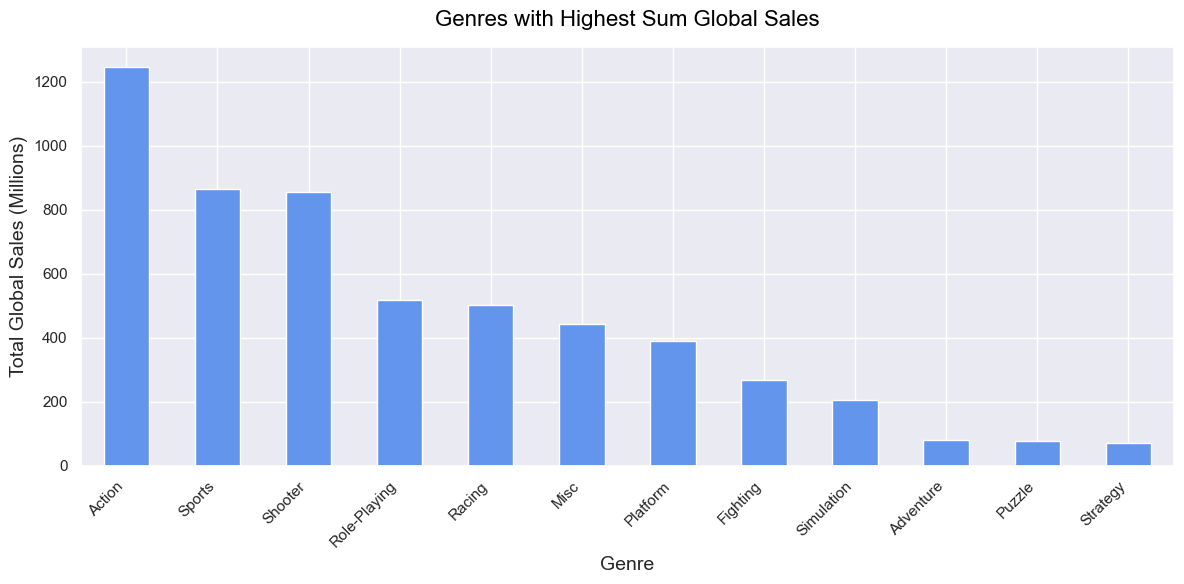

In [286]:
# Total Global Sales by Genre
sales_by_genre = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sales_by_genre.plot(kind='bar', color='cornflowerblue', edgecolor='white')
plt.title("Genres with Highest Sum Global Sales", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Total Global Sales (Millions)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Critic Score Analysis by Genre

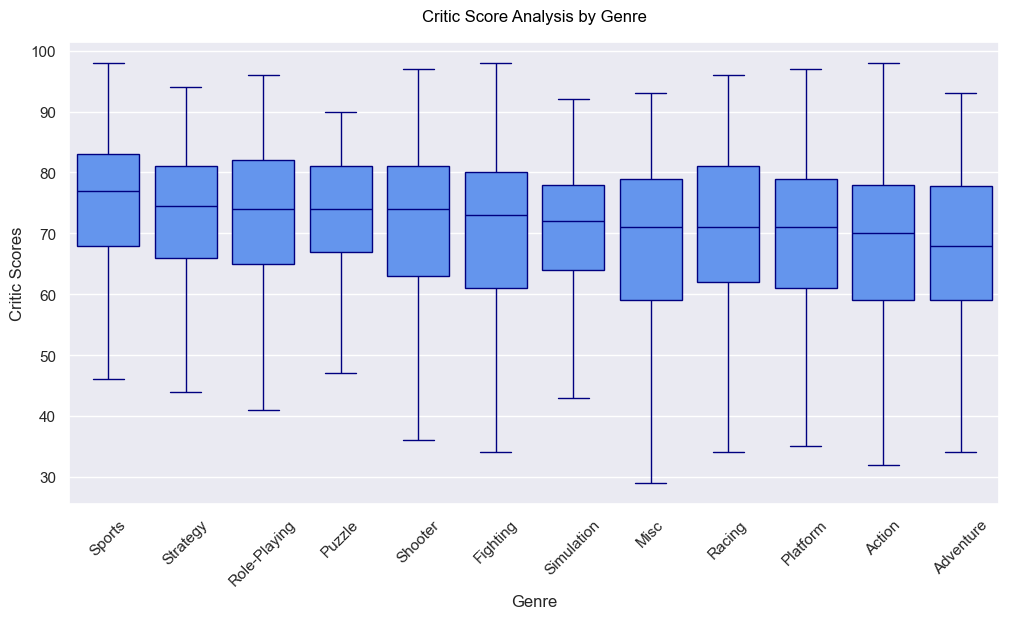

In [287]:
critic_scores_by_genre = data.groupby('Genre')['Critic_Score'].median().sort_values(ascending=False)

# Boxplot for Critic Scores by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Genre',
    y='Critic_Score',
    order=critic_scores_by_genre.index,
    showfliers=False,  # Döljer extremvärdespunkterna
    boxprops={'facecolor': 'cornflowerblue', 'edgecolor': 'navy'},
    whiskerprops={'color': 'navy'},
    capprops={'color': 'navy'},
    medianprops={'color': 'navy'}
)
plt.xticks(rotation=45)
plt.title("Critic Score Analysis by Genre")
plt.xlabel("Genre")
plt.ylabel("Critic Scores")
plt.show()

User Score Analysis by Genre, scaling User Scores

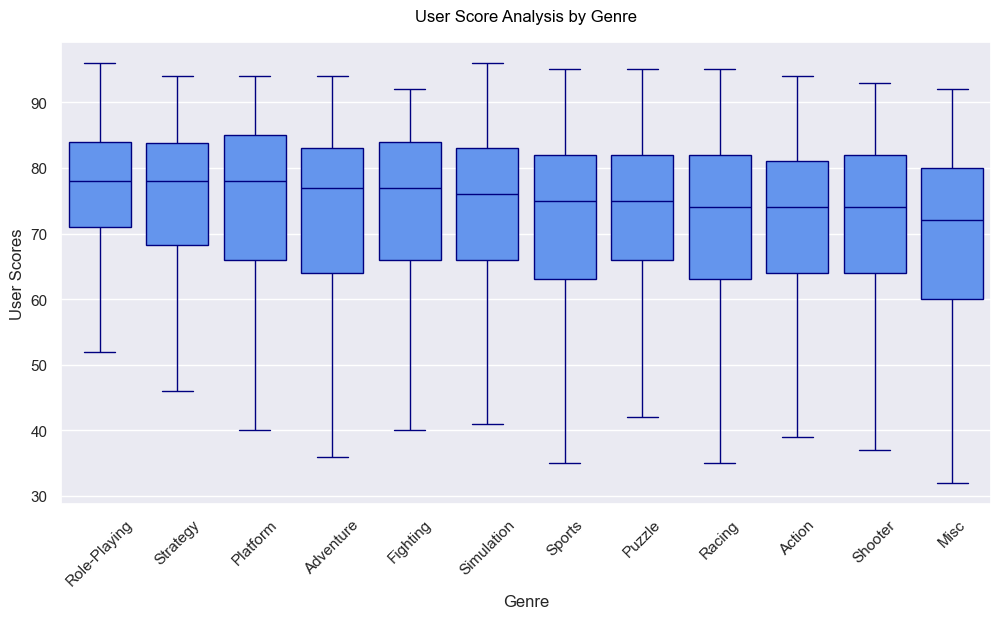

In [288]:
# Scale User_Score to a 0–100 range
if data['User_Score'].max() <= 10:
    data['User_Score'] = data['User_Score'] * 10

# Calculate median User_Score for each Genre
user_scores_by_genre = data.groupby('Genre')['User_Score'].median().sort_values(ascending=False).index

# Boxplot for User Scores by Genre (sorted in descending order)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Genre',
    y='User_Score',
    order=user_scores_by_genre,
    showfliers = False,
    boxprops={'facecolor': 'cornflowerblue', 'edgecolor': 'navy'},
    whiskerprops={'color': 'navy'},
    capprops={'color': 'navy'},
    medianprops={'color': 'navy'}
)
plt.xticks(rotation=45)
plt.title("User Score Analysis by Genre")
plt.xlabel("Genre")
plt.ylabel("User Scores")
plt.show()

Difference in Scores by Genre

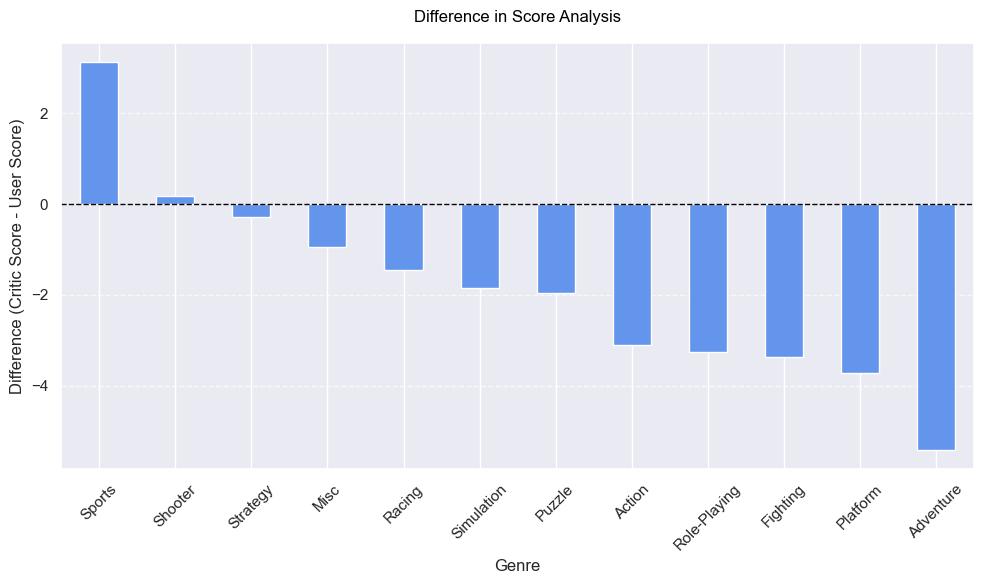

In [289]:
# Difference in Scores by Genre
data['Score_Difference'] = data['Critic_Score'] - data['User_Score']
difference_by_genre = data.groupby('Genre')['Score_Difference'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
difference_by_genre.plot(kind='bar', color='cornflowerblue', edgecolor='white')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0
plt.title("Difference in Score Analysis")
plt.xlabel("Genre")
plt.ylabel("Difference (Critic Score - User Score)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation Between Scores and Global Sales

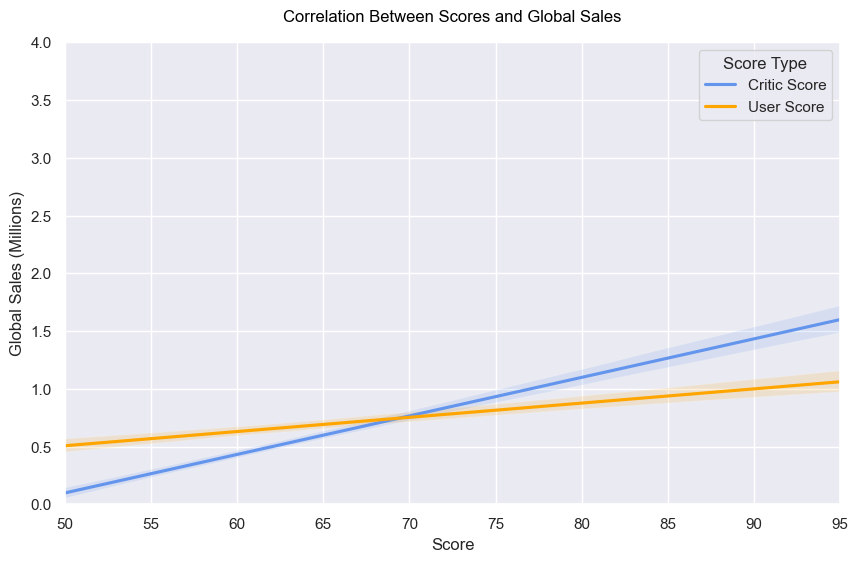

In [290]:
plt.figure(figsize=(10, 6))

# Plot the regression line for Critic Score
sns.regplot(data=data, x='Critic_Score', y='Global_Sales', scatter=False, label='Critic Score', color='cornflowerblue')

# Plot the regression line for User Score
sns.regplot(data=data, x='User_Score', y='Global_Sales', scatter=False, label='User Score', color='orange')

plt.title("Correlation Between Scores and Global Sales")
plt.xlabel("Score")
plt.ylabel("Global Sales (Millions)")
plt.xlim(50, 95)  # Adjust x-axis range
plt.ylim(0, 4)    # Adjust y-axis range
plt.legend(title="Score Type")
plt.show()

Proportion of Sales for Each Genre Across Regions

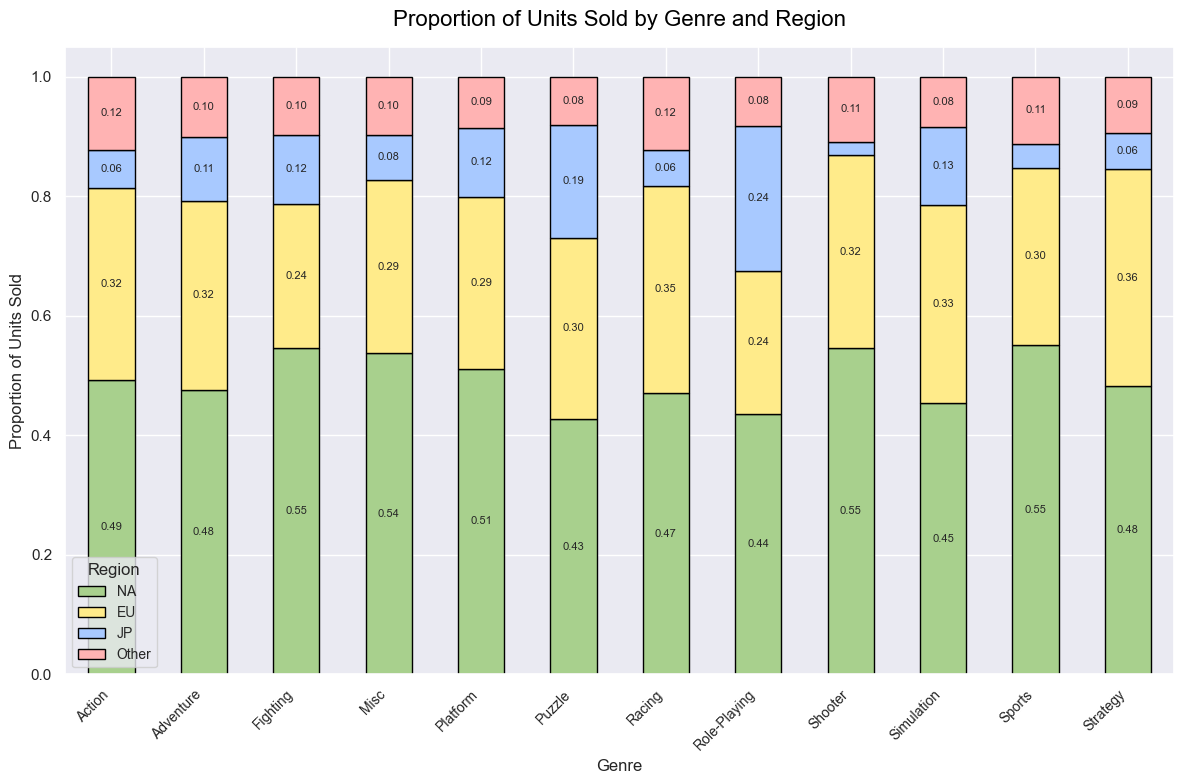

In [291]:
# # Create a stacked bar chart
ax = proportional_sales.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#A8D08D', '#FFEB8A', '#A8C9FF', '#FFB3B3'], edgecolor='black')

# Add numerical labels for each segment in the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0.05:  # Only label segments larger than 5%
        ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', fontsize=8)

plt.title("Proportion of Units Sold by Genre and Region", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Proportion of Units Sold", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Region", labels=['NA', 'EU', 'JP', 'Other'], fontsize=10)
plt.tight_layout()
plt.show()
